In [ ]:
 !pip install inference-sdk
 !pip install roboflow
 !pip install ultralytics==8.0.0

In [ ]:
!nvidia-smi

Wed May  8 04:48:21 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   43C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [ ]:
import torch

# Check PyTorch GPU availability
if torch.cuda.is_available():
    print(f"GPU Name: {torch.cuda.get_device_name(0)}")
    print(f"GPU Is Available: {torch.cuda.is_available()}")
else:
    print("GPU is not available.")

GPU Name: Tesla T4
GPU Is Available: True


In [ ]:
import os
import glob
from IPython.display import Image, display,Video
from IPython import display

In [ ]:
import ultralytics

In [ ]:
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
ultralytics.checks()

Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 30.0/78.2 GB disk)


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
current_directory = os.getcwd()
print(current_directory)

/content


In [ ]:

# Specify the path to the directory you want to set as the working directory
directory_path = '/content/gdrive/MyDrive/ANPR'

# Use os.chdir() to change the current working directory to the specified path
os.chdir(directory_path)

# Verify that the working directory has been changed
current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

Current Working Directory: /content/gdrive/MyDrive/ANPR


In [ ]:
from roboflow import Roboflow
rf = Roboflow(api_key="PhPydT4vcmuFp8O0JNcs")
project = rf.workspace("ong-aun-jie-heuag").project("car-plate-detection-p4bwm")
version = project.version(1)
dataset = version.download("yolov8")

In [ ]:

current_directory = os.getcwd()
print(f"Current Working Directory: {current_directory}")

Current Working Directory: /content/gdrive/MyDrive/ANPR


In [ ]:
!yolo task=detect mode=train model=yolov8m.pt data=/content/gdrive/MyDrive/ANPR/car-plate-detection-1/data.yaml epochs=70 imgsz=640
#locate to yaml because yaml contain my configuration settings for my train/test/valid folders and what class to target

yolo/engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/gdrive/MyDrive/ANPR/car-plate-detection-1/data.yaml, epochs=70, patience=50, batch=16, imgsz=640, save=True, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=False, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, retina_masks=False, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=17, workspace=4, nms=False, lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmu

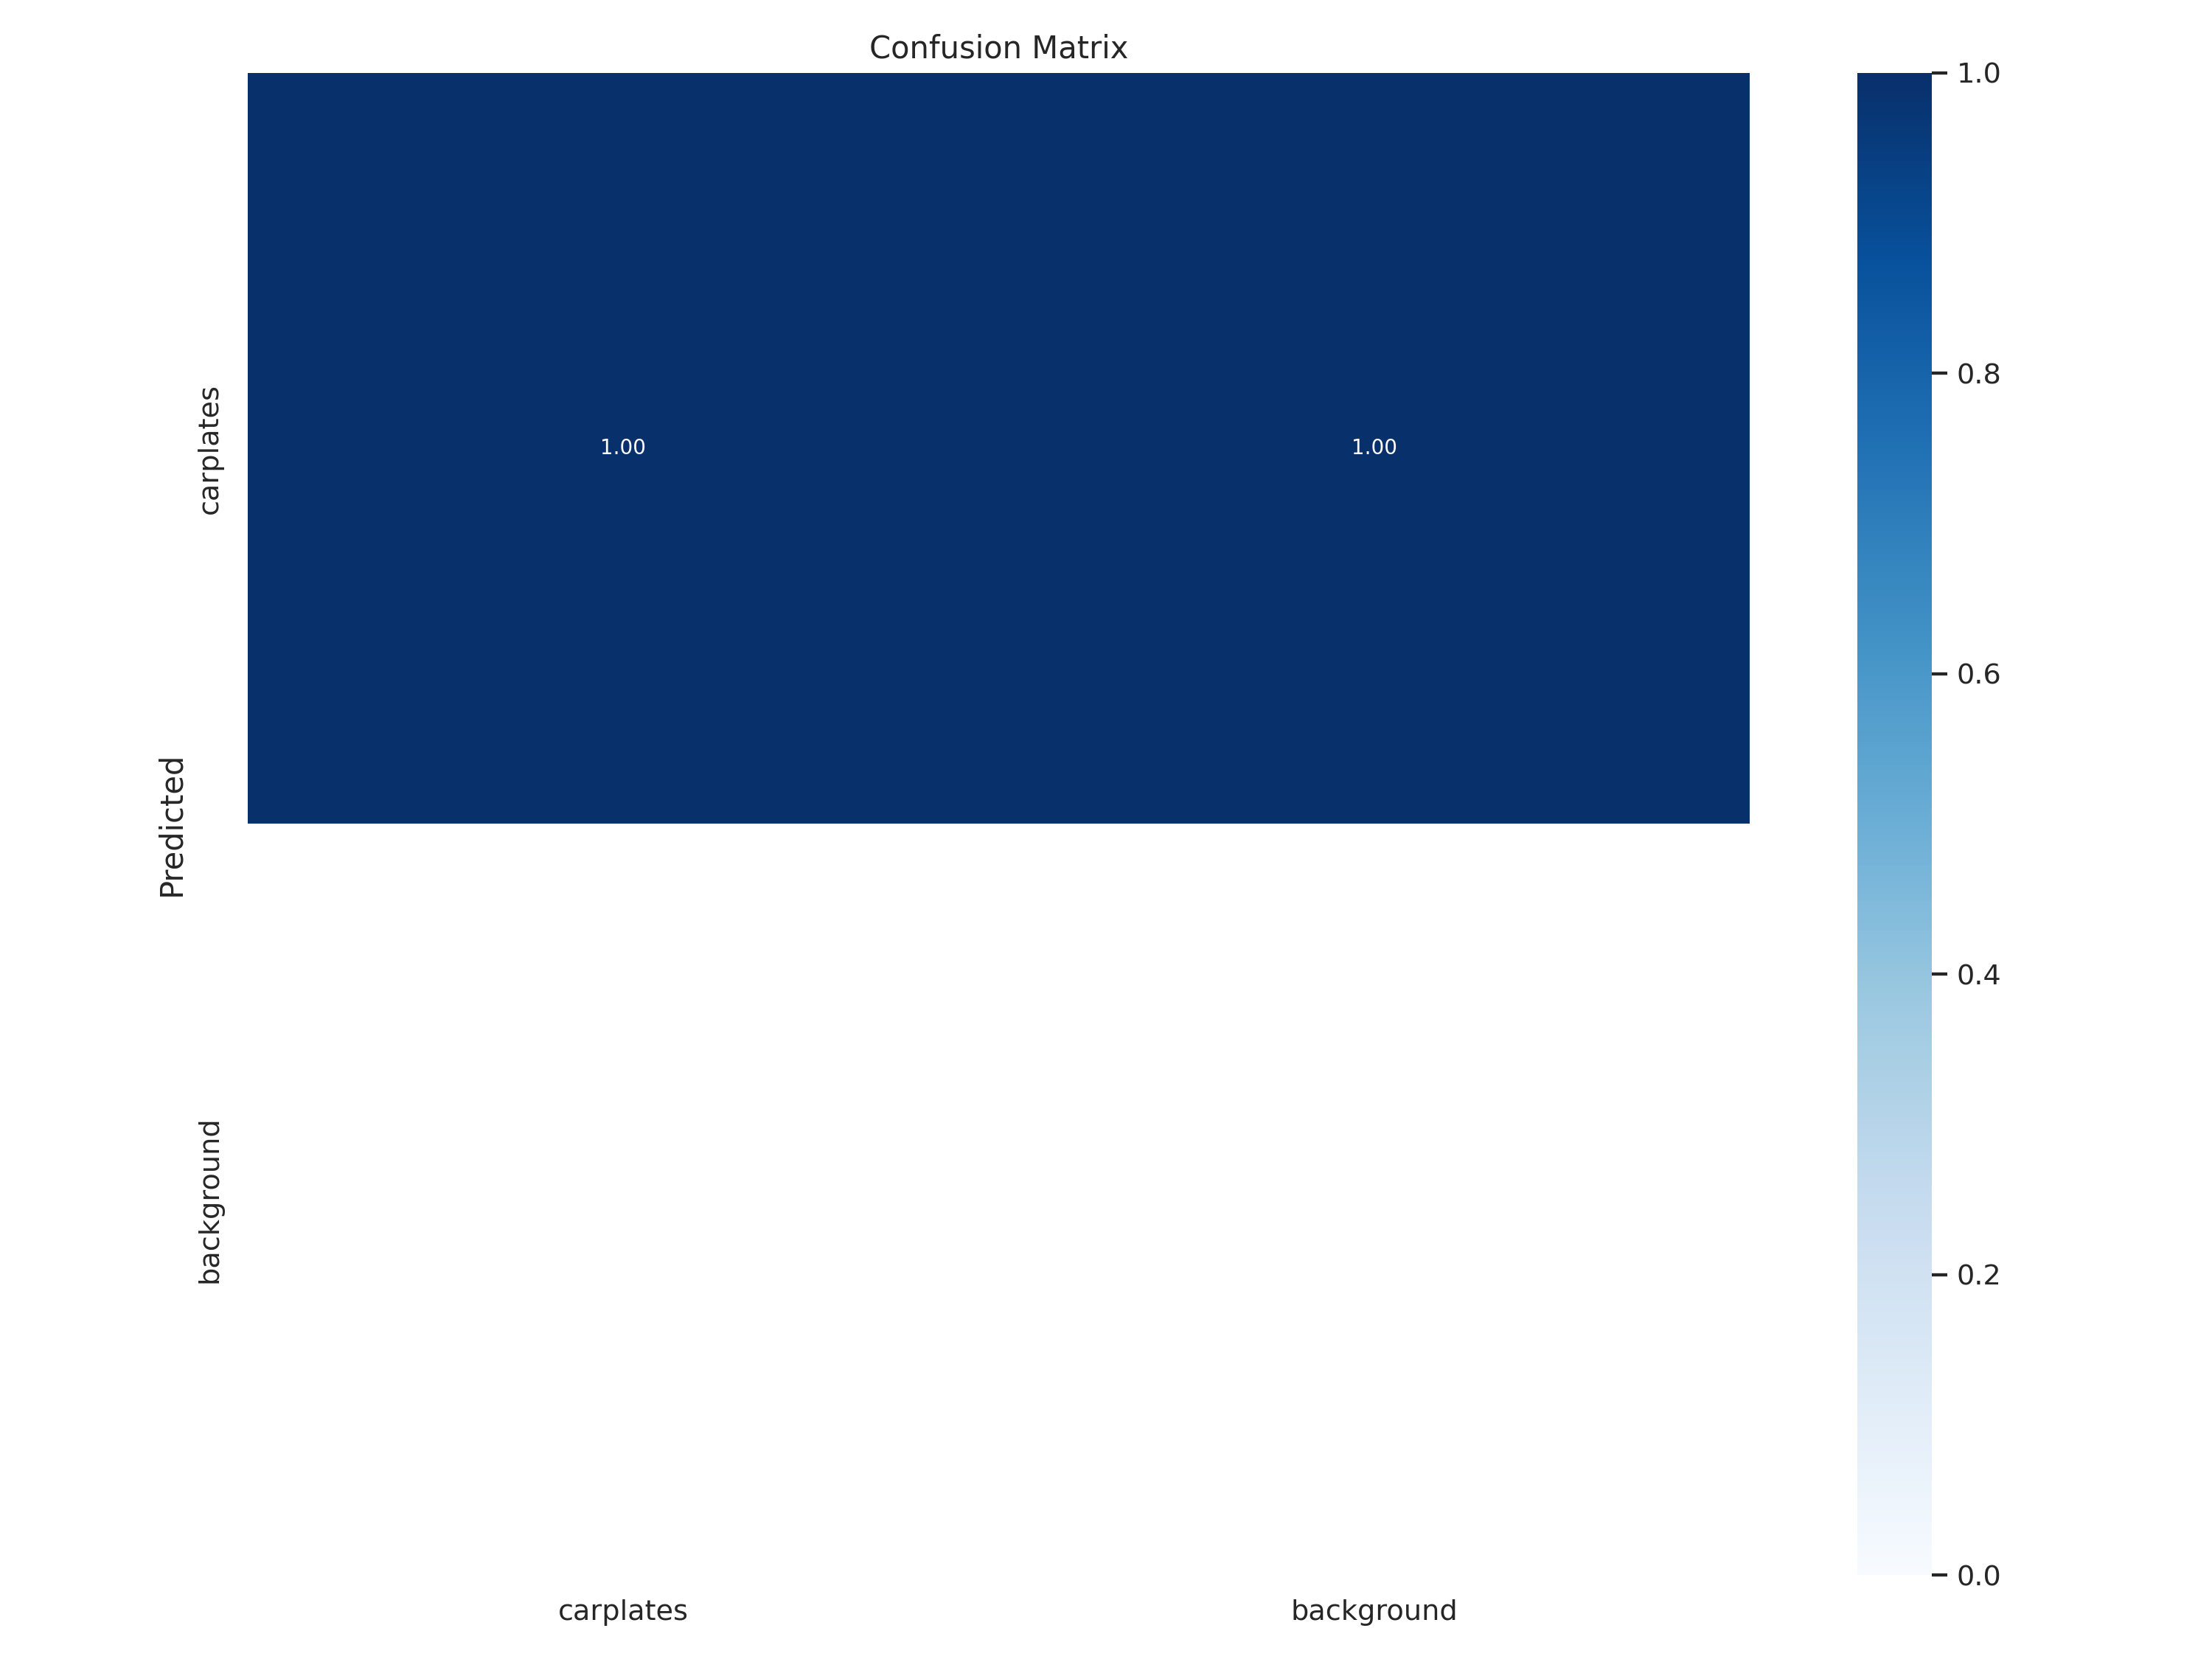

In [ ]:
#Confusion matrix is the chart that shows how our model handles different classes
#68% of the time the model detected correctly that there is a pothole, while 32% of the time, when the pothole is there but the model is not
#able to detect it
Image('/content/gdrive/MyDrive/ANPR/runs/detect/train3/confusion_matrix.png', width=900)

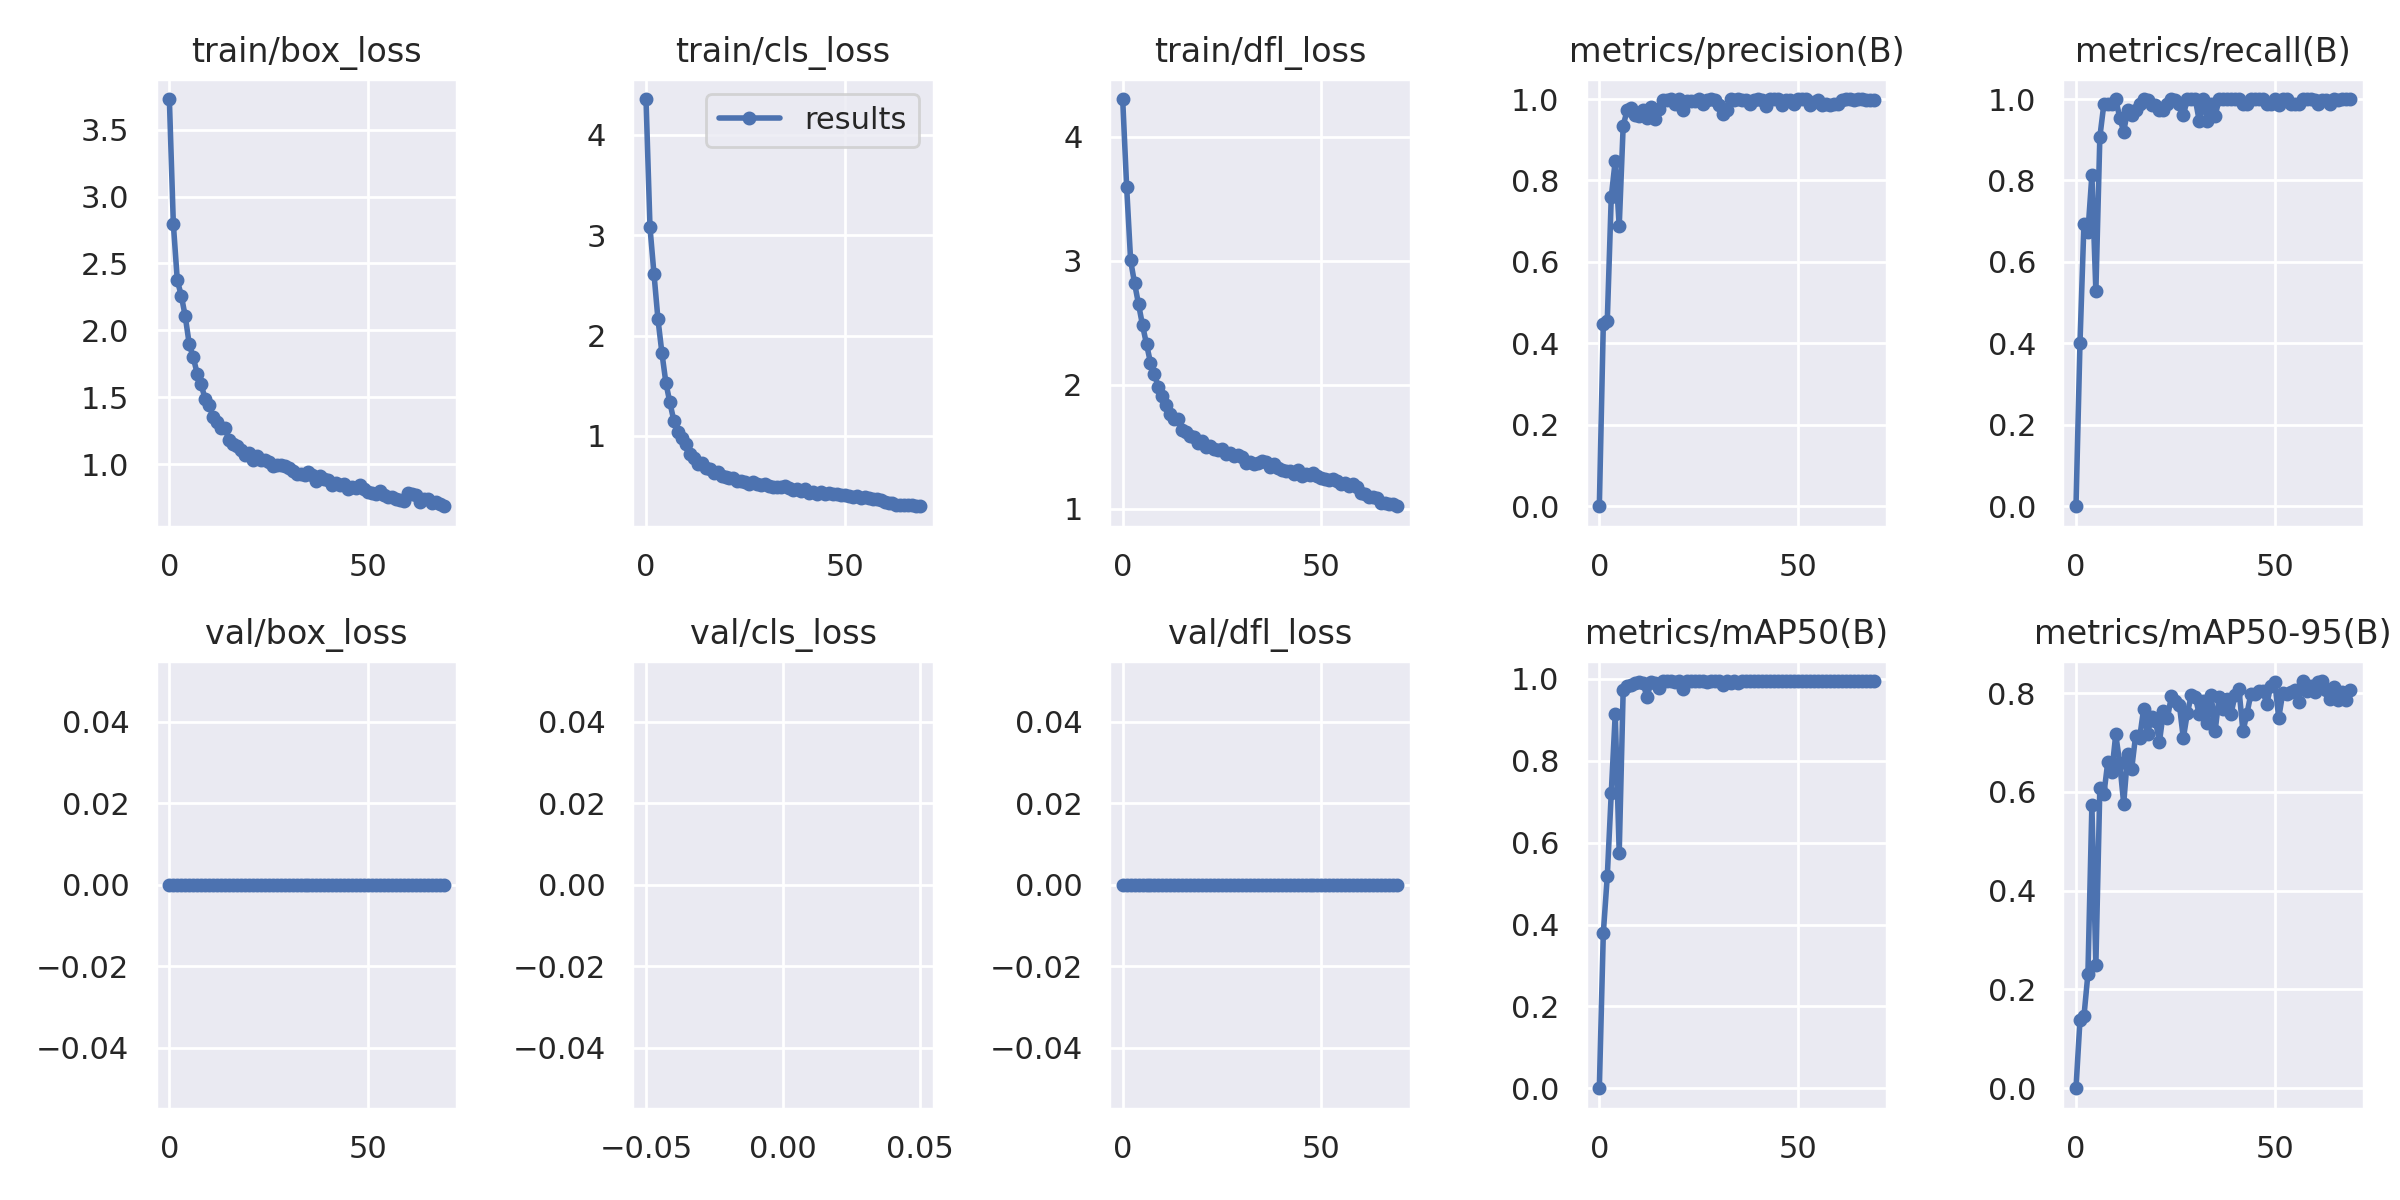

In [ ]:
# Here is the graph of the training and validation loss
#box loss and class loss is important
# The behavior of the model is convincing the model is coverging, Training more will give better results

Image('/content/gdrive/MyDrive/ANPR/runs/detect/train3/results.png', width=600)

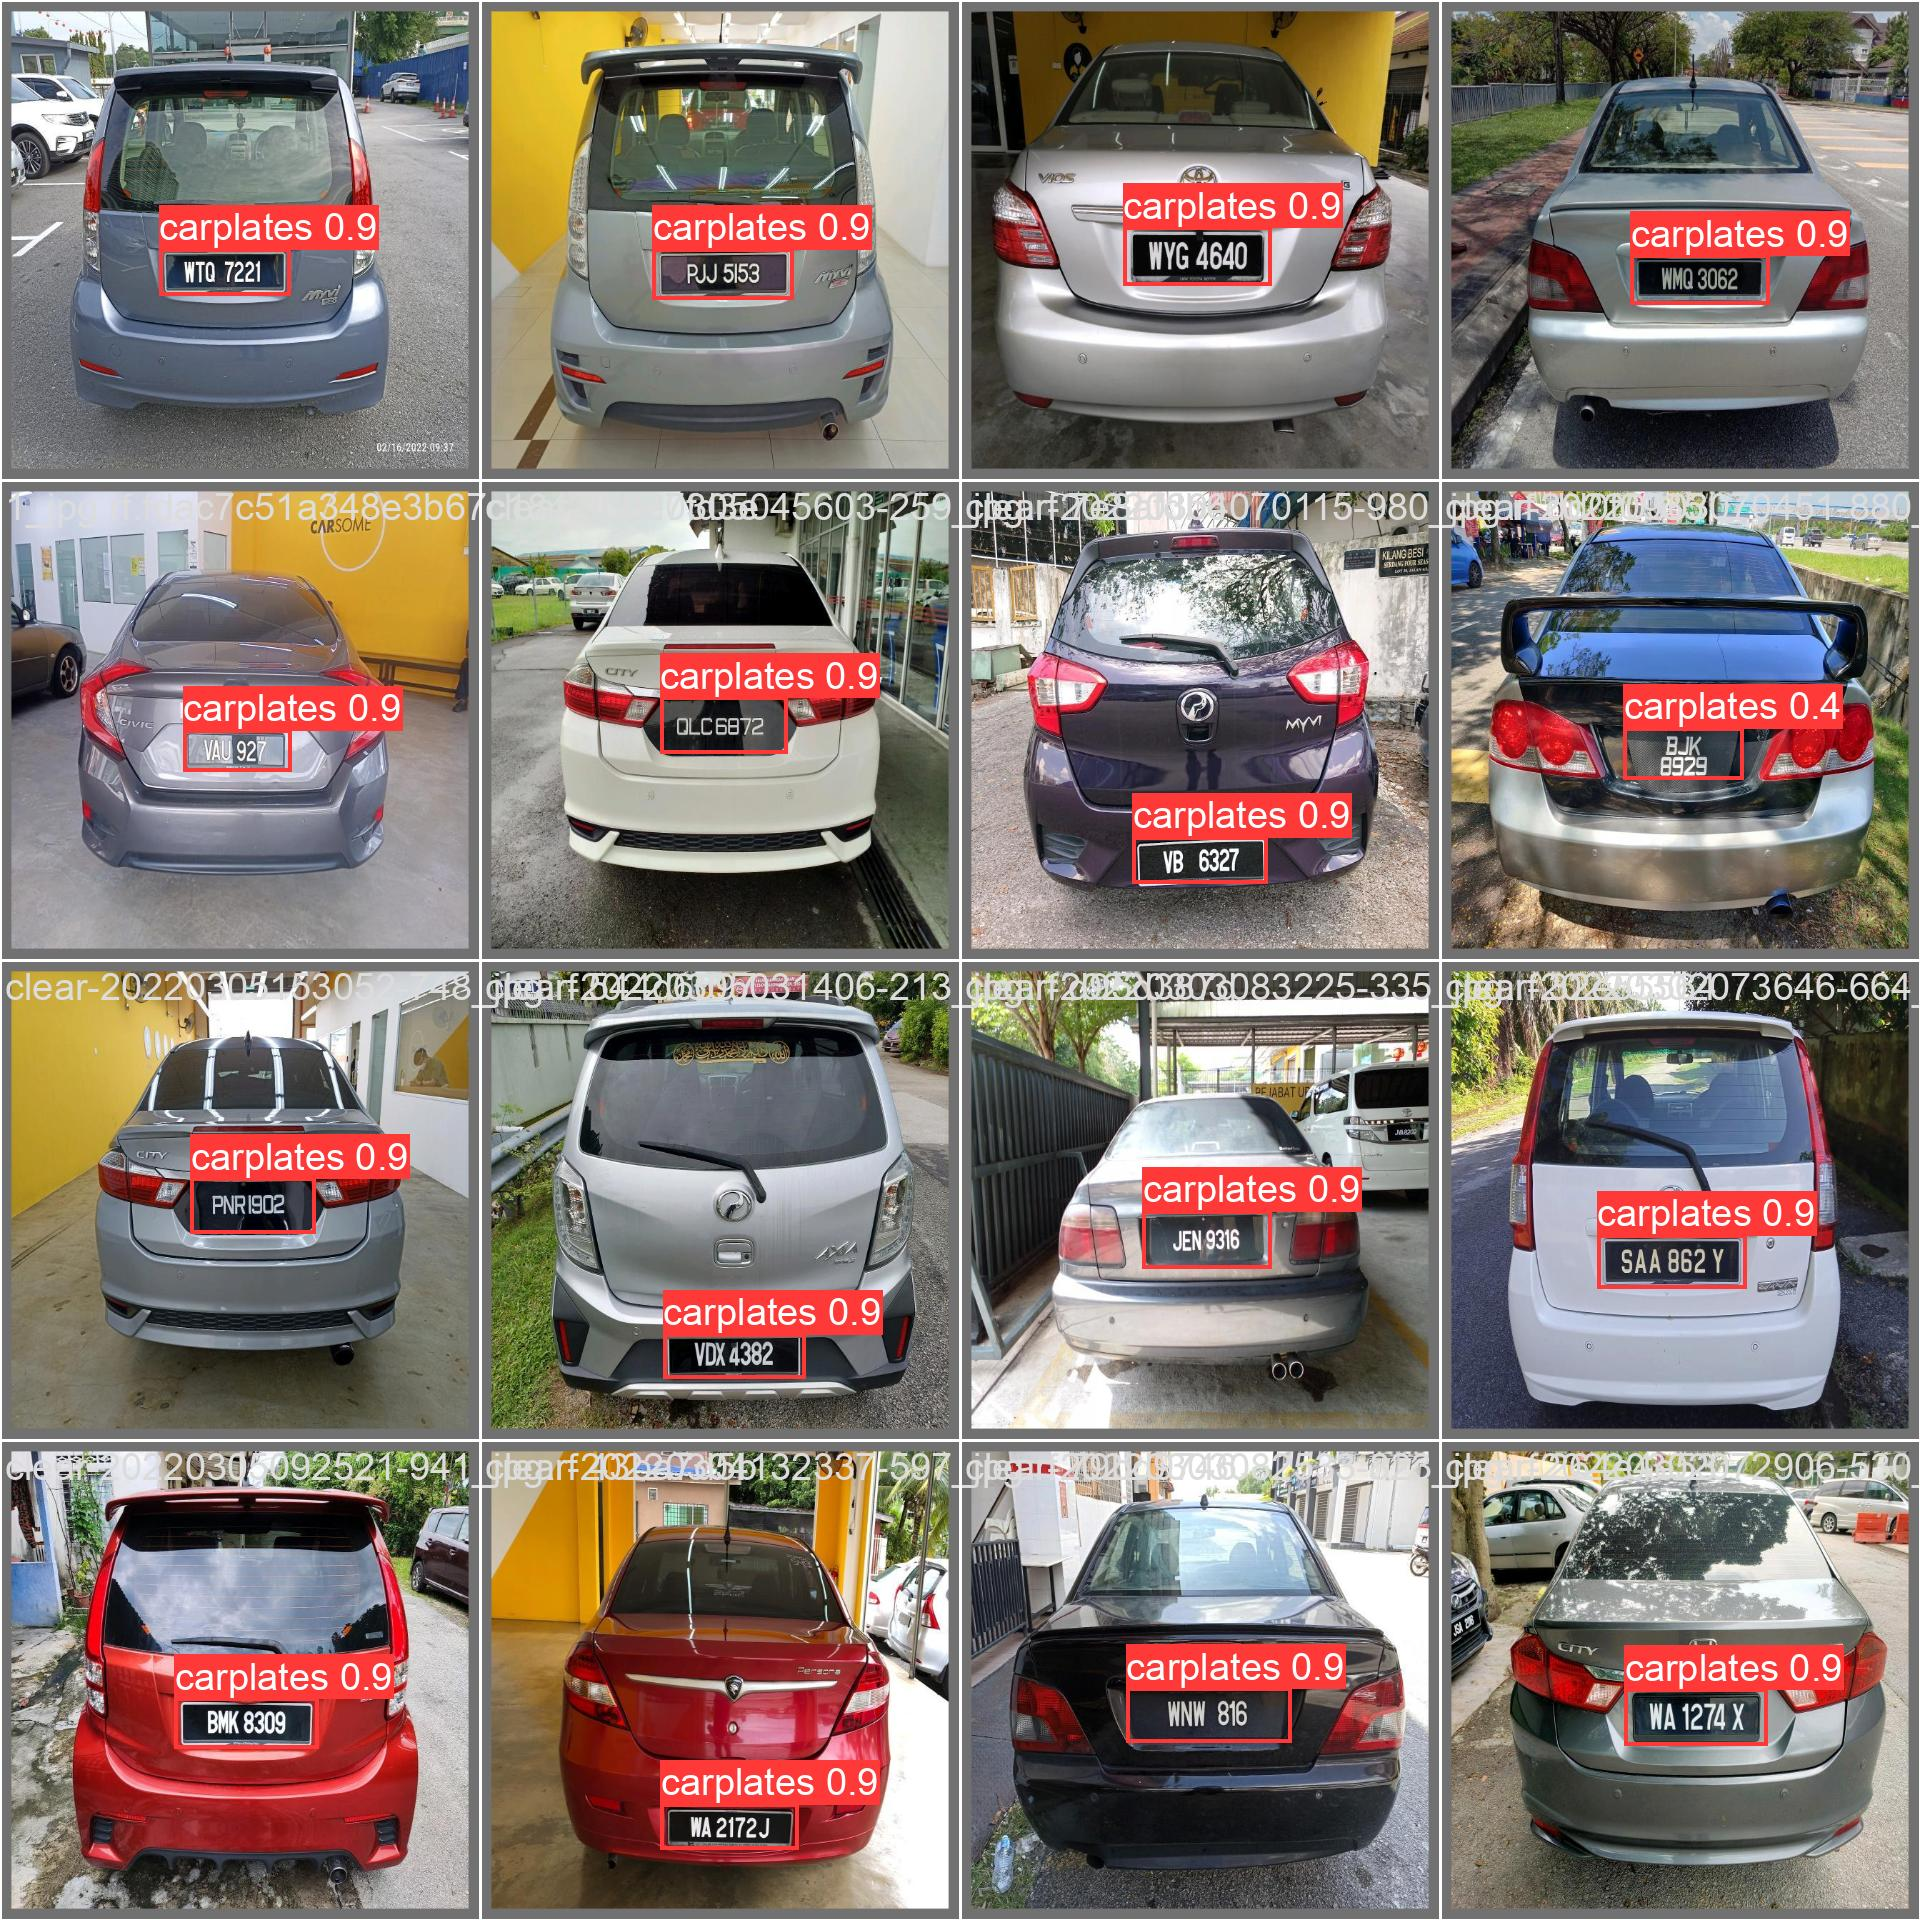

In [ ]:
#Model Prediction on validation batch.
#These image are not used strictly for training so it is always better to take a
#look and see how model is behaving
Image('/content/gdrive/MyDrive/ANPR/runs/detect/train3/val_batch0_pred.jpg', width=600)

In [ ]:
#Here, we are taking the model best weights and using them to validate the model.
#Similarly as before we are using
#CLI to do that, The only difference is our mode = val instead of train
#Validation Script is using test dataset that was not used before
!yolo task=detect mode=val model=/content/gdrive/MyDrive/ANPR/runs/detect/train3/weights/best.pt data=/content/gdrive/MyDrive/ANPR/car-plate-detection-1/data.yaml

2024-05-08 04:55:57.091316: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 04:55:57.091369: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 04:55:57.092769: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 04:55:58.318539: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
100% 755k/755k [00:00<00:00, 45.0MB/s]
val: Scanning /content/gd

# Predicting on a Personal Image

In [ ]:
!yolo task=detect mode=predict \
model=/content/gdrive/MyDrive/ANPR/runs/detect/train3/weights/best.pt conf=0.25 \
source=/content/gdrive/MyDrive/ANPR/testpic.png

2024-05-08 05:03:15.211575: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 05:03:15.211627: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 05:03:15.212936: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 05:03:16.412694: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
image 1/1 /content/gdrive/MyDrive/ANPR/testpic.png: 640x544 1 ca

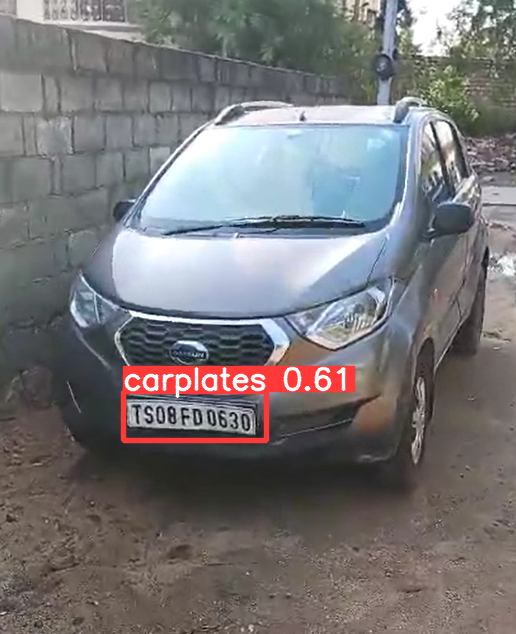

In [ ]:
Image("/content/gdrive/MyDrive/ANPR/runs/detect/predict3/testpic.png")

# Predicting on a Test Video

In [ ]:
!yolo task=detect mode=predict\
 model=/content/gdrive/MyDrive/ANPR/runs/detect/train3/weights/best.pt conf=0.25\
  source=/content/gdrive/MyDrive/ANPR/4513830-uhd_3840_2160_30fps.mp4

2024-05-08 05:43:21.519723: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-08 05:43:21.519780: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-08 05:43:21.521241: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-08 05:43:22.720863: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
Ultralytics YOLOv8.0.0 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Fusing layers... 
Model summary: 218 layers, 25840339 parameters, 0 gradients, 78.7 GFLOPs
video 1/1 (1/308) /content/gdrive/MyDrive/ANPR/4513830-uhd_3840_